## TIME SERIES FORCASTING 

In [249]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as s 
import statsmodels.api as sms
%matplotlib inline

In [250]:
df = pd.read_csv('Sales.csv')

In [251]:
df.head()

,Month,Sales
0,2005-01-31,139695
1,2005-02-28,163398
2,2005-03-31,134535
3,2005-04-30,79298
4,2005-05-31,67362


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   248 non-null    object
 1   Sales   248 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [253]:
df.describe()

,Sales
count,248.000000
mean,159291.483871
std,51547.960159
min,67362.000000
25%,120940.000000
50%,153467.000000
75%,190467.250000
max,303262.000000


Text(0.5, 1.0, 'The Sales Data Analysis')

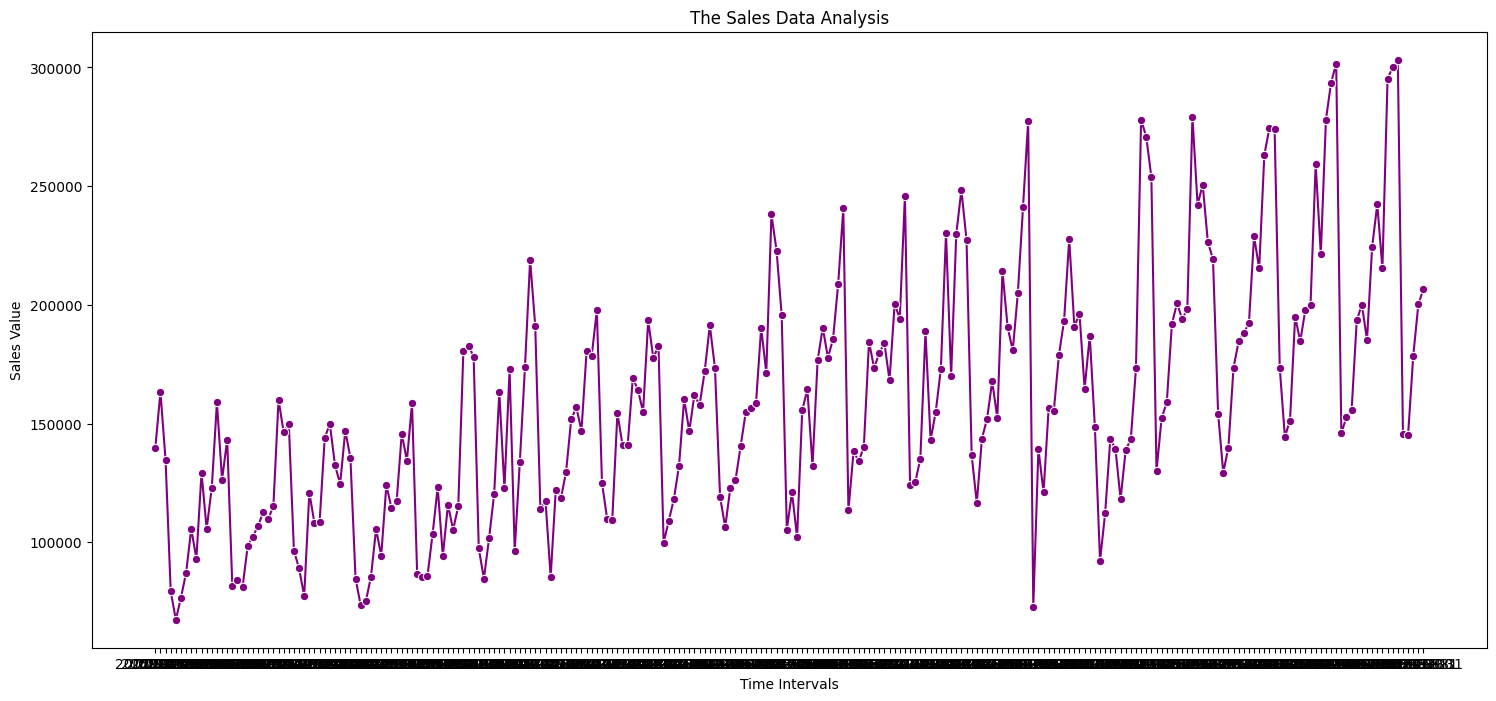

In [254]:
plt.figure(figsize=(18, 8))
s.lineplot(x='Month',y='Sales',data=df,c='Purple',marker='o')
plt.xlabel('Time Intervals')
plt.ylabel('Sales Value')
plt.title("The Sales Data Analysis")

In [255]:
df = df.reset_index()
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2005-01-31 to 2025-08-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   248 non-null    int64
 1   Sales   248 non-null    int64
dtypes: int64(2)
memory usage: 5.8 KB


In [257]:
df = df.drop(columns=['index'])

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2005-01-31 to 2025-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   248 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


In [259]:
df.head()

,Sales
Month,
2005-01-31,139695
2005-02-28,163398
2005-03-31,134535
2005-04-30,79298
2005-05-31,67362


In [260]:
## Step-1 Checking if the dataset is stationary or not 
from statsmodels.tsa.stattools import adfuller 
def ad_test(series):
    result = adfuller(series)
    print('ADE Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis,reject the null hypothesis-Data is stationary')
    else :
        print('Week Evidence against NUll Hypothesis - Data is not stationary')

In [261]:
ad_test(df['Sales'])

ADE Statistics: -0.6305507051593103
p-value: 0.8639283289985105
Week Evidence against NUll Hypothesis - Data is not stationary


In [262]:
## The dataset is not stationary hence we will perform differencing 

In [263]:
df['F-diff'] = df['Sales'] - df['Sales'].shift(1)

In [264]:
df.head()

,Sales,F-diff
Month,,
2005-01-31,139695,NaN
2005-02-28,163398,23703.0
2005-03-31,134535,-28863.0
2005-04-30,79298,-55237.0
2005-05-31,67362,-11936.0


In [265]:
ad_test(df['F-diff'].dropna())

ADE Statistics: -7.62465831222986
p-value: 2.0840803168265895e-11
Strong evidence against the null hypothesis,reject the null hypothesis-Data is stationary


In [266]:
## Since the dataset is now stationary after performing the first differenting 

In [267]:
df['12-diff'] = df['Sales'] - df['Sales'].shift(12)

In [268]:
df['24-diff'] = df['Sales'] - df['Sales'].shift(24)

In [269]:
df['36-diff'] = df['Sales'] - df['Sales'].shift(36)

In [270]:
df['48-diff'] = df['Sales'] - df['Sales'].shift(48)

In [271]:
df['60-diff'] = df['Sales'] - df['Sales'].shift(60)

In [272]:
df.head(70)

,Sales,F-diff,12-diff,24-diff,36-diff,48-diff,60-diff
Month,,,,,,,
2005-01-31,139695,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,163398,23703.0,NaN,NaN,NaN,NaN,NaN
2005-03-31,134535,-28863.0,NaN,NaN,NaN,NaN,NaN
2005-04-30,79298,-55237.0,NaN,NaN,NaN,NaN,NaN
2005-05-31,67362,-11936.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-06-30,101585,16920.0,15968.0,26505.0,24187.0,20357.0,24896.0
2010-07-31,120457,18872.0,17082.0,34993.0,-417.0,21964.0,33301.0
2010-08-31,163243,42786.0,40093.0,57694.0,55249.0,60835.0,57582.0


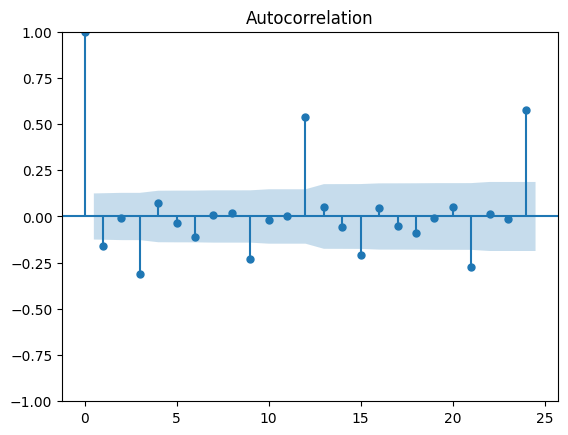

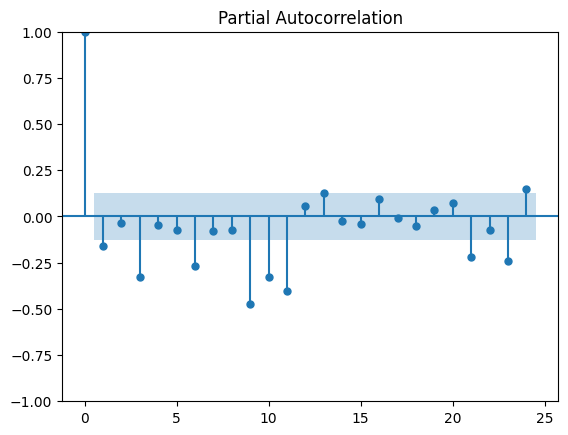

In [273]:
## Plotting ACF and PACF for First Differencing 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df['F-diff'].dropna())  #(p,d,q)
pacf = plot_pacf(df['F-diff'].dropna())

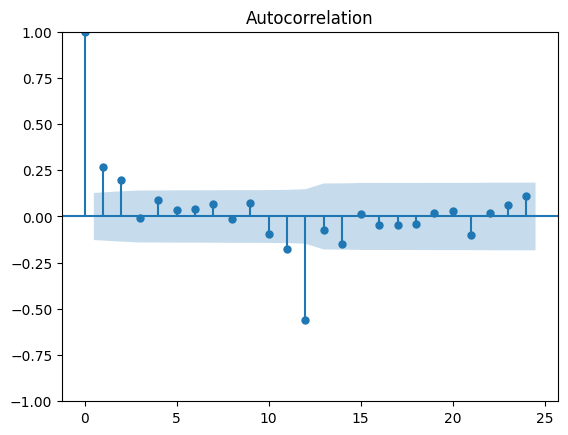

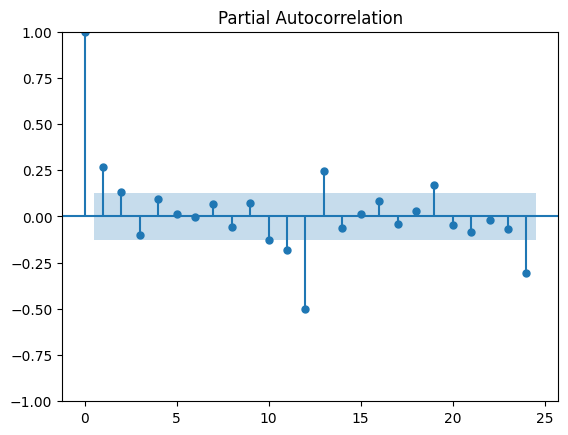

In [274]:
## Plotting ACF and PACF of 12th Differencing 
## Plotting ACF and PACF for First Differencing 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df['12-diff'].dropna())  #(p,d,q)
pacf = plot_pacf(df['12-diff'].dropna())

In [275]:
train_data = df['2005':'2023']
test_data = df['2024':'2025']

In [276]:
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

Training set size: 228
Testing set size: 20


In [277]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data['Sales'], order=(1, 1, 1))
model_fit = model.fit(disp=False)

/home/amisha/Downloads/python/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/amisha/Downloads/python/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [278]:
# The number of steps to forecast is the length of your test data
forecast_steps = len(test_data)

# Get the forecast for the next `forecast_steps`
forecast = model_fit.get_forecast(steps=forecast_steps)

# The 'forecast' object contains the predicted values and confidence intervals.
predicted_values = forecast.predicted_mean
print("Forecasted values for the test period:")
print(predicted_values)

Forecasted values for the test period:
2024-01-31    210553.636160
2024-02-29    204911.254348
2024-03-31    201972.782558
2024-04-30    200442.468455
2024-05-31    199645.502745
2024-06-30    199230.454396
2024-07-31    199014.303149
2024-08-31    198901.734670
2024-09-30    198843.110615
2024-10-31    198812.580045
2024-11-30    198796.680161
2024-12-31    198788.399728
2025-01-31    198784.087397
2025-02-28    198781.841597
2025-03-31    198780.672016
2025-04-30    198780.062915
2025-05-31    198779.745704
2025-06-30    198779.580505
2025-07-31    198779.494472
2025-08-31    198779.449667
Freq: ME, Name: predicted_mean, dtype: float64


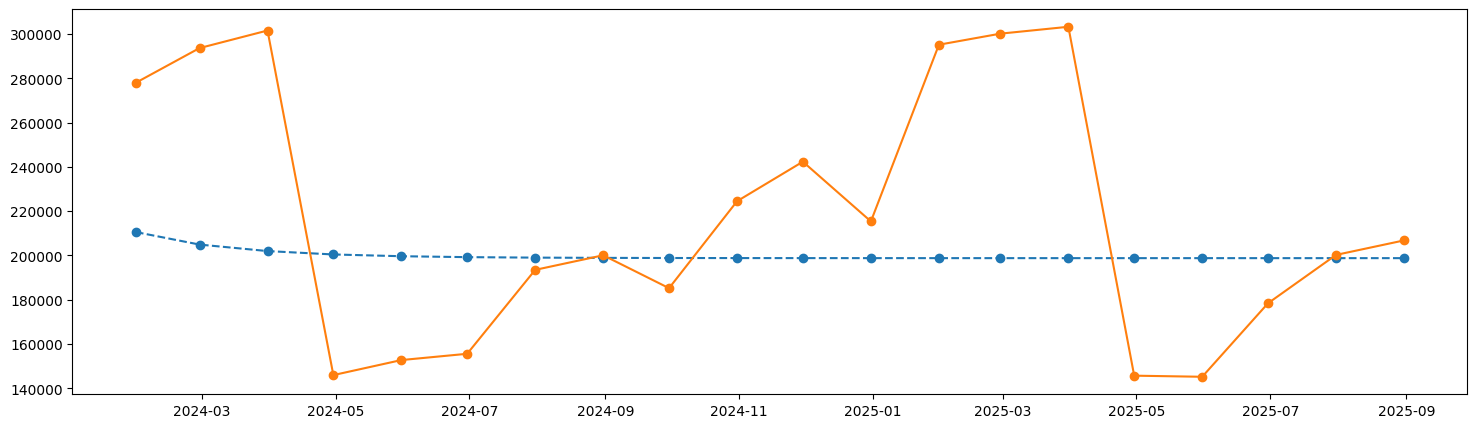

In [279]:
plt.figure(figsize=(18,5))
plt.plot(predicted_values,marker='o',label='The Predicted Value',linestyle='--')
plt.plot(test_data['Sales'],marker='o',label = 'The existing Value')

In [280]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
ae = mean_absolute_error(test_data['Sales'], predicted_values)
rmse = np.sqrt(mean_squared_error(test_data['Sales'], predicted_values))
mape = np.mean(np.abs((test_data['Sales'] - predicted_values) / test_data['Sales'])) * 100
print(f'Mean Absolute Error:{ae}')
print(f"Root Mean Square Error:{rmse}")
print(f"Mean Absolute Percentage Error:{mape}")

Mean Absolute Error:47281.78078330161
Root Mean Square Error:58783.99265652059
Mean Absolute Percentage Error:21.085025644026626


In [281]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  228
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2690.499
Date:                Mon, 18 Aug 2025   AIC                           5386.998
Time:                        18:05:00   BIC                           5397.273
Sample:                    01-31-2005   HQIC                          5391.144
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5208      0.091      5.718      0.000       0.342       0.699
ma.L1         -0.9534      0.036    -26.553      0.000      -1.024      -0.883
sigma2      1.369e+09   1.56e-11   8.75e+19      0.000    1.37e+09    1.37e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                96.06
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.85e+35. Standard errors may be unstable.
"""

In [282]:
sarima_model = SARIMAX(train_data['Sales'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

/home/amisha/Downloads/python/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/amisha/Downloads/python/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [283]:
results = sarima_model.fit(disp=False)
print("--- SARIMA Model Summary ---")
print(results.summary())

--- SARIMA Model Summary ---
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  228
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2326.428
Date:                            Mon, 18 Aug 2025   AIC                           4662.855
Time:                                    18:05:01   BIC                           4679.372
Sample:                                01-31-2005   HQIC                          4669.539
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1935      0.178      1.087      0.277      -0.155       0.542
ma.L1 

In [284]:
forecast_steps = len(test_data)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean

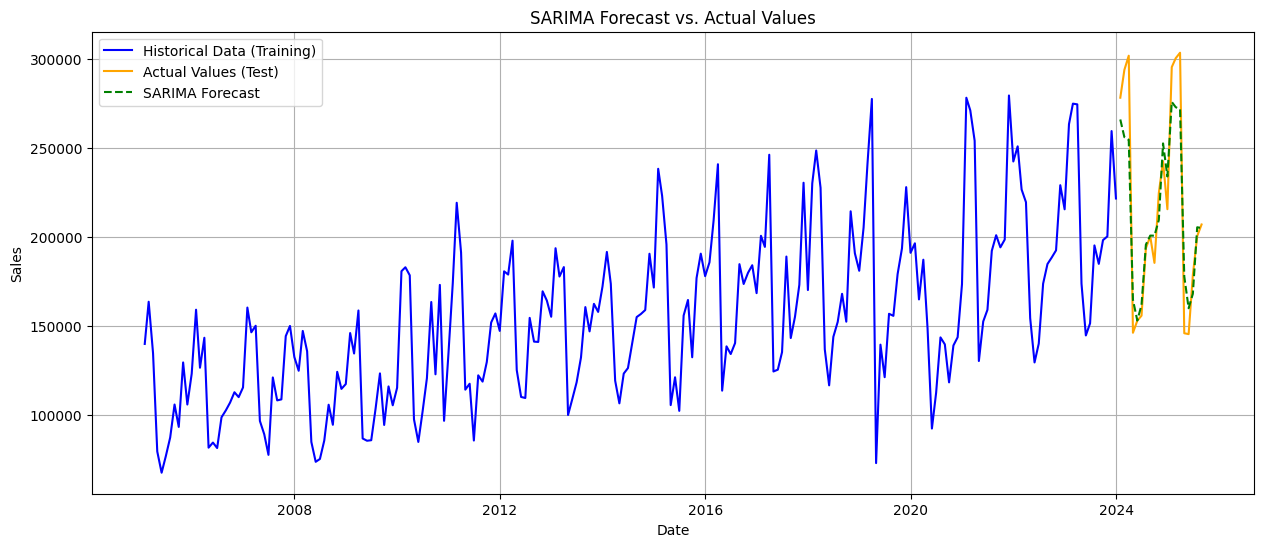

In [285]:
plt.figure(figsize=(15, 6))
plt.plot(train_data['Sales'], label='Historical Data (Training)', color='blue')
plt.plot(test_data['Sales'], label='Actual Values (Test)', color='orange')
plt.plot(predicted_values, label='SARIMA Forecast', color='green', linestyle='--')
plt.title('SARIMA Forecast vs. Actual Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

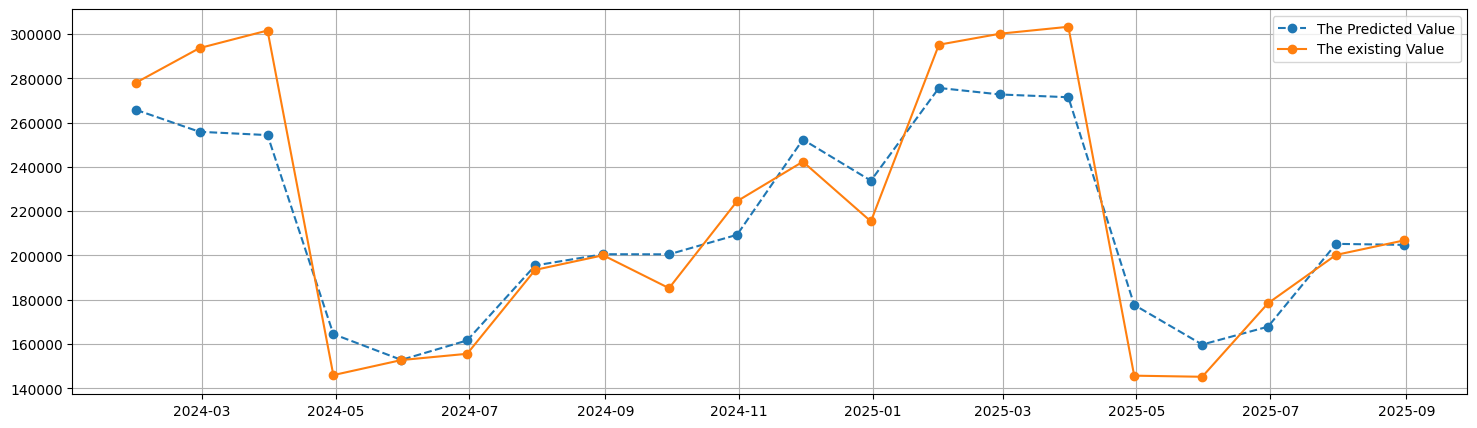

In [297]:
plt.figure(figsize=(18,5))
plt.plot(predicted_values,marker='o',label='The Predicted Value',linestyle='--')
plt.plot(test_data['Sales'],marker='o',label = 'The existing Value')
plt.legend()
plt.grid(True)
plt.show()

In [287]:
mae = mean_absolute_error(test_data['Sales'], predicted_values)
rmse = np.sqrt(mean_squared_error(test_data['Sales'], predicted_values))
mape = np.mean(np.abs((test_data['Sales'] - predicted_values) / test_data['Sales'])) * 100

In [288]:
print(f'Mean Absolute Error:{ae}')
print(f"Root Mean Square Error:{rmse}")
print(f"Mean Absolute Percentage Error:{mape}")

Mean Absolute Error:47281.78078330161
Root Mean Square Error:20753.789328257975
Mean Absolute Percentage Error:7.304316743808465


In [289]:
model = SARIMAX(df['Sales'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
forecast = results.get_forecast(steps=16)

/home/amisha/Downloads/python/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/amisha/Downloads/python/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [290]:
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [291]:
print(forecasted_values)

2025-09-30    207640.008056
2025-10-31    218567.620226
2025-11-30    263087.039346
2025-12-31    236785.018813
2026-01-31    289947.579626
2026-02-28    295886.060639
2026-03-31    298988.657927
2026-04-30    171025.033232
2026-05-31    165244.628008
2026-06-30    174941.286079
2026-07-31    210370.449936
2026-08-31    213460.595737
2026-09-30    210092.014026
2026-10-31    230094.317482
2026-11-30    266230.719645
2026-12-31    239725.667675
Freq: ME, Name: predicted_mean, dtype: float64


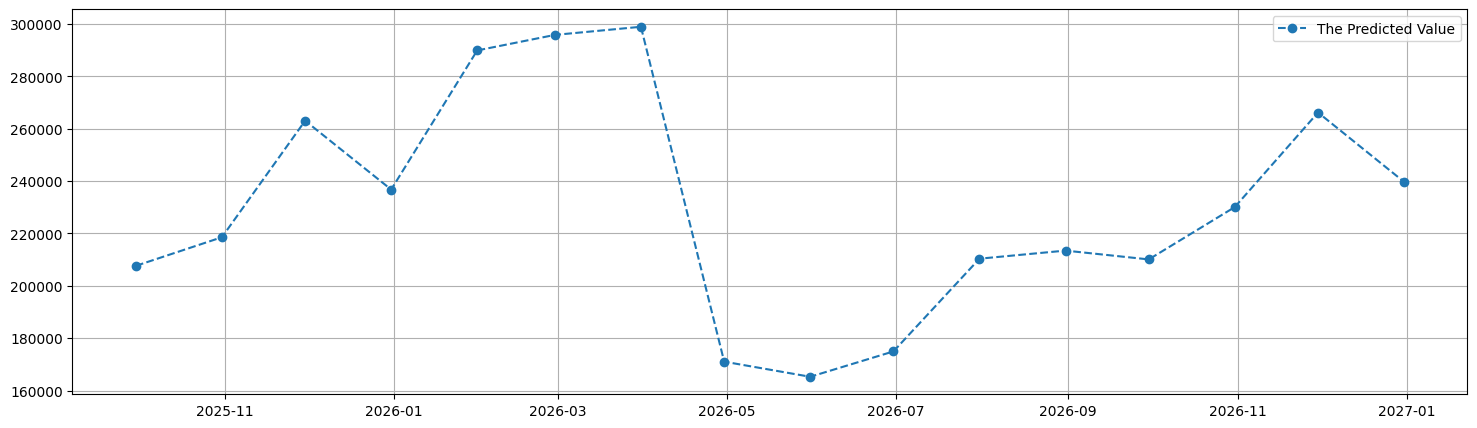

In [296]:
plt.figure(figsize=(18,5))
plt.plot(forecasted_values,marker='o',label='The Predicted Value',linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

the highest forecasted sales for 2026 will occur in the first quarter (Q1).
The plot shows that the predicted values peak around March 2026

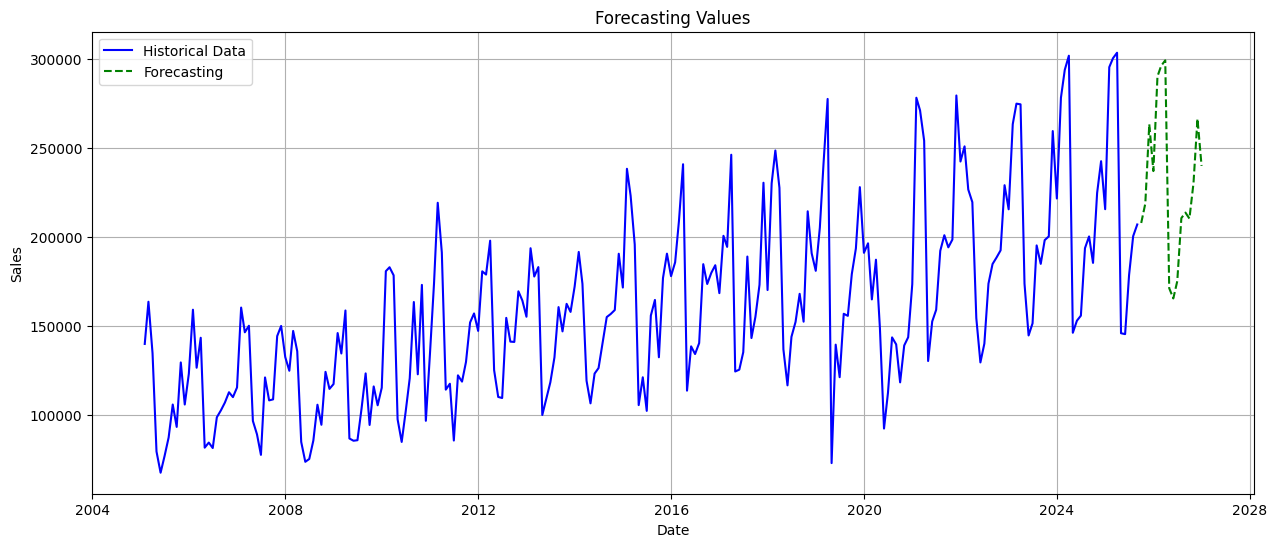

In [295]:
plt.figure(figsize=(15, 6))
plt.plot(df['Sales'], label='Historical Data', color='blue')
plt.plot(forecasted_values, label='Forecasting', color='green', linestyle='--')
plt.title('Forecasting Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()